# MNIST with 3 layer

## import 

In [1]:
import tensorflow as tf
import numpy as np
from random import randint
from matplotlib import pyplot as plt
import os
import imageio

2024-11-24 17:53:49.538793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732458229.555655    6641 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732458229.561163    6641 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 17:53:49.577353: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## load Data

In [2]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## for error 403, manual download and load data

x_train = np.load('../data/mnist/x_train.npy')
y_train = np.load('../data/mnist/y_train.npy')
x_test  = np.load('../data/mnist/x_test.npy')
y_test  = np.load('../data/mnist/y_test.npy')

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Prediction

In [3]:
def predict_test_data(model, show_image=True):
    ims_idx = []
    for i in range(10):
        x = randint(0, 9999)
        ims_idx.append(x)

    results = []
    msgs = []
    r = str()
    msg = ''

    for i in ims_idx:
        results.append(model.predict(x_test[i].reshape(1, 28, 28, 1)))

    for i in range(len(ims_idx)):
        if str(np.argmax(results[i])) == str(y_test[ims_idx[i]]):
            msg = "Correct " + str(np.argmax(results[i]))
            r += 'T '
        else:
            msg = "Wrong " + str(np.argmax(results[i])) + " - " + str(y_test[ims_idx[i]])
            r += 'F ' 

        msgs.append(msg)
        msg = ''
        
    print(r)
    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j][z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(x_test[ims_idx[i]].reshape(28, 28), cmap='binary')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()

    return r

def predict_real_data(model, show_image=True):
    ls = os.listdir('../img/')
    ims = [] 
    idx = []
    r = str()
    msgs = []

    for i in ls:
        if i.endswith('.png'):
            ims.append(imageio.imread('../img/' + i, mode='F'))  
            idx.append(i[0])

    for i in range(len(ims)):
        result = np.argmax(model.predict(ims[i].reshape(1, 28, 28, 1)))

        if str(result) == str(idx[i]):
            msg = "Correct " + str(result)
            r += 'T '
        else:
            msg = "Wrong " + str(result) + " - " + str(idx[i])
            r += 'F '

        msgs.append(msg)

    print(r)

    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j, z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(ims[i], cmap='grey')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()
        
    return r

## Create Model for 4 layers

In [4]:
path_l4 = '../saved_weights/l4/main_4layers.weights.h5'
activation_function = 'sigmoid' # 'relu' 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=activation_function),
    tf.keras.layers.Dense(128, activation=activation_function),
    tf.keras.layers.Dense(64, activation=activation_function),
    tf.keras.layers.Dense(32, activation=activation_function),
    tf.keras.layers.Dense(10, activation='softmax')
])


/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1732458231.978690    6641 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4730 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


In [5]:
# Compile Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [6]:
# Train Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


I0000 00:00:1732458233.931790    6719 service.cc:148] XLA service 0x70802c0054d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732458233.931808    6719 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-11-24 17:53:53.957087: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732458234.068637    6719 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-24 17:53:54.611615: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 183/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.2088 - loss: 2.2231

I0000 00:00:1732458235.008872    6719 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 967us/step - accuracy: 0.6524 - loss: 1.1817
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.9479 - loss: 0.2007
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.9671 - loss: 0.1208
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9753 - loss: 0.0884
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9799 - loss: 0.0718


In [7]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1122


[0.09758136421442032, 0.9714999794960022]

### save and load

In [8]:
# save model
model.save_weights(path_l4)

In [9]:
# load model 
model.load_weights(path_l4)

### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
T T T T T T T T T T 


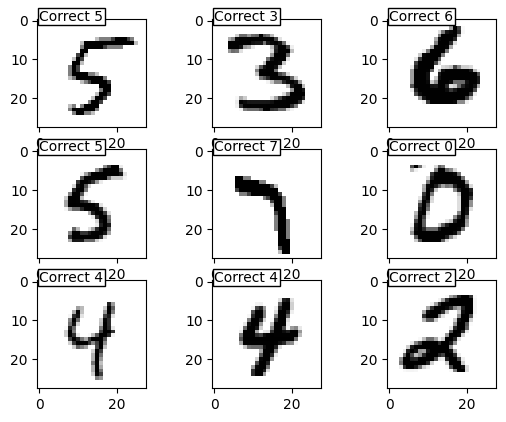

In [10]:
r = predict_test_data(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/tmp/ipykernel_6641/2023242906.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims.append(imageio.imread('../img/' + i, mode='F'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
F F F F F F F F F 


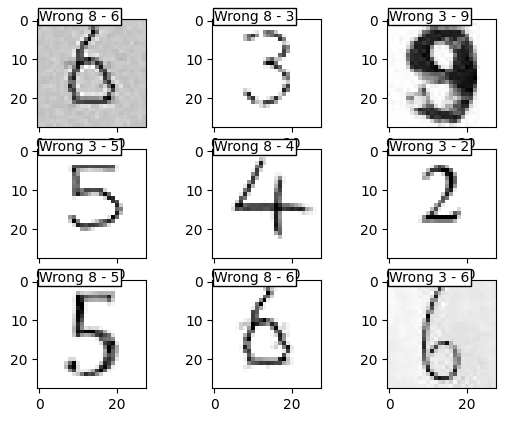

In [11]:
r = predict_real_data(model)

## Create Model for 8 layers

In [12]:
path_l8 = '../saved_weights/l8/main_8layers.weights.h5'
activation_function = 'sigmoid' # 'relu' 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4096, activation=activation_function),
    tf.keras.layers.Dense(2048, activation=activation_function),
    tf.keras.layers.Dense(1024, activation=activation_function),
    tf.keras.layers.Dense(512,  activation=activation_function),
    tf.keras.layers.Dense(256,  activation=activation_function),
    tf.keras.layers.Dense(128,  activation=activation_function),
    tf.keras.layers.Dense(64,   activation=activation_function),
    tf.keras.layers.Dense(32,   activation=activation_function),
    tf.keras.layers.Dense(10,   activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │     3,215,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,403,882 (54.95 MB)

 Trainable params: 14,403,882 (54.95 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1019 - loss: 2.3100
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1069 - loss: 2.3035
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1057 - loss: 2.3031
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1060 - loss: 2.3030
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1126 - loss: 2.3021


In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.3019


[2.301640510559082, 0.11349999904632568]

In [15]:
# save weights the  model
model.save_weights(path_l8)

In [16]:
# load weights
model.load_weights(path_l8)

### Predition

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
F F F F T F F F F F 


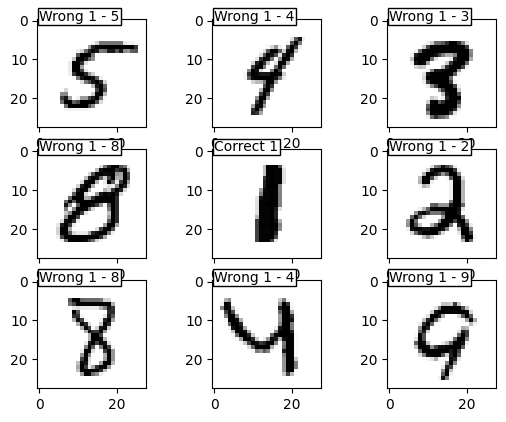

In [17]:
r = predict_test_data(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/tmp/ipykernel_6641/2023242906.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims.append(imageio.imread('../img/' + i, mode='F'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
F F F F F F F F F 


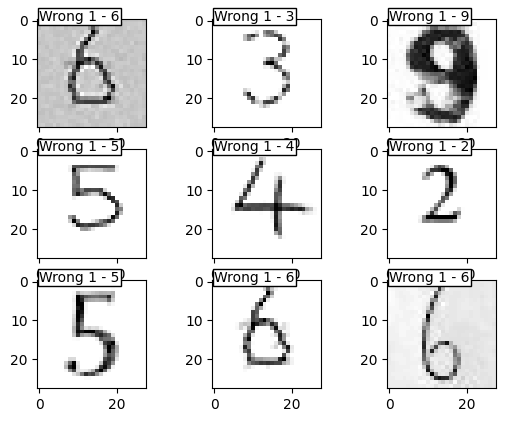

In [18]:
r = predict_real_data(model)